# StyleGAN2-ADA: sampling images with a trained model

References:
- this notebook: https://github.com/woctezuma/steam-stylegan2-ada
- the original StyleGAN2-ADA repository: https://github.com/NVlabs/stylegan2-ada
- my fork of StyleGAN2-ADA: https://github.com/woctezuma/stylegan2-ada

## Mount Google Drive

In [1]:
%pip install Google-Colab-Transfer

In [2]:
import colab_transfer

drive_path = colab_transfer.get_path_to_home_of_google_drive()
colab_path = colab_transfer.get_path_to_home_of_local_machine()

colab_transfer.mount_google_drive()

Mounted at /content/drive/


## Switch to Tensorflow 1.x

> TensorFlow 2.x is not supported.

Reference: https://github.com/NVlabs/stylegan2-ada#requirements

> Colab uses TensorFlow 2.x by default, though you can switch to 1.x by the method shown below.

Reference: https://colab.research.google.com/notebooks/tensorflow_version.ipynb

In [3]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


## Install my fork of StyleGAN2-ADA

Switch to the branch `fix-assertion-error`.

In [4]:
%cd /content/

%rm -rf stylegan2-ada/
!git clone https://github.com/woctezuma/stylegan2-ada.git

%cd stylegan2-ada/
!git checkout fix-assertion-error

%cd /content/

/content
Cloning into 'stylegan2-ada'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 112 (delta 7), reused 10 (delta 2), pack-reused 95
Receiving objects: 100% (112/112), 1.39 MiB | 30.29 MiB/s, done.
Resolving deltas: 100% (48/48), done.
/content/stylegan2-ada
Branch 'fix-assertion-error' set up to track remote branch 'fix-assertion-error' from 'origin'.
Switched to a new branch 'fix-assertion-error'
/content


## Import previously prepared datasets from Google Drive

NB: this is only useful for quality metrics.

In [5]:
folder_name = 'datasets/steam/'

colab_transfer.copy_folder(folder_name)

Copying /content/drive/My Drive/datasets/steam/ to /content/datasets/steam/


## Specify the snapshot found on Google Drive

Create a symbolic link to Google Drive, to avoid issues with the space in `My Drive`:

In [6]:
# Reference: https://github.com/pjreddie/darknet/issues/1672#issuecomment-527442785
!ln -s "/content/drive/My Drive/" "/content/gdrive"

The path to a checkpoint corresponding to a fully trained model is specified.

In [7]:
gdrive_root = '/content/gdrive/'
result_root_folder = 'training-runs/'

In [8]:
result_folder_name_to_load = '00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/'
network_base_name='network-snapshot-005000.pkl'

In [14]:
from pathlib import Path

network_pkl = f'{gdrive_root}{result_root_folder}{result_folder_name_to_load}{network_base_name}'

print('{}\nFile exists? {}'.format(
    network_pkl,
    Path(network_pkl).exists(),
))

/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl
File exists? True


## Quality metrics

Reference: https://github.com/NVlabs/stylegan2-ada#quality-metrics

In [41]:
%cd /content/

/content


### StyleGAN2-ADA

In [42]:
!python stylegan2-ada/calc_metrics.py --network={network_pkl} --metrics=fid50k_full

Loading network from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.

Gs                            Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
G_mapping/Normalize           -         (?, 512)            -               
G_mapping/Dense0              262656    (?, 512)            (512, 512)      
G_mapping/Dense1              262656    (?, 512)            (512, 512)      
G_mapping/Dense2              262656    (?, 512)            (512, 512)      
G_mapping/Dense3              262656    (?, 512)            (512, 512)      
G_mapping/Dense4    

In [43]:
!python stylegan2-ada/calc_metrics.py --network={network_pkl} --metrics=kid50k_full

Loading network from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.

Gs                            Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
G_mapping/Normalize           -         (?, 512)            -               
G_mapping/Dense0              262656    (?, 512)            (512, 512)      
G_mapping/Dense1              262656    (?, 512)            (512, 512)      
G_mapping/Dense2              262656    (?, 512)            (512, 512)      
G_mapping/Dense3              262656    (?, 512)            (512, 512)      
G_mapping/Dense4    

In [44]:
!python stylegan2-ada/calc_metrics.py --network={network_pkl} --metrics=pr50k3_full

Loading network from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.

Gs                            Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
G_mapping/Normalize           -         (?, 512)            -               
G_mapping/Dense0              262656    (?, 512)            (512, 512)      
G_mapping/Dense1              262656    (?, 512)            (512, 512)      
G_mapping/Dense2              262656    (?, 512)            (512, 512)      
G_mapping/Dense3              262656    (?, 512)            (512, 512)      
G_mapping/Dense4    

In [45]:
!python stylegan2-ada/calc_metrics.py --network={network_pkl} --metrics=is50k

Loading network from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.

Gs                            Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
G_mapping/Normalize           -         (?, 512)            -               
G_mapping/Dense0              262656    (?, 512)            (512, 512)      
G_mapping/Dense1              262656    (?, 512)            (512, 512)      
G_mapping/Dense2              262656    (?, 512)            (512, 512)      
G_mapping/Dense3              262656    (?, 512)            (512, 512)      
G_mapping/Dense4    

### Legacy: StyleGAN2

In [46]:
!python stylegan2-ada/calc_metrics.py --network={network_pkl} --metrics=fid50k

Loading network from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.

Gs                            Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
G_mapping/Normalize           -         (?, 512)            -               
G_mapping/Dense0              262656    (?, 512)            (512, 512)      
G_mapping/Dense1              262656    (?, 512)            (512, 512)      
G_mapping/Dense2              262656    (?, 512)            (512, 512)      
G_mapping/Dense3              262656    (?, 512)            (512, 512)      
G_mapping/Dense4    

In [47]:
!python stylegan2-ada/calc_metrics.py --network={network_pkl} --metrics=kid50k

Loading network from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.

Gs                            Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
G_mapping/Normalize           -         (?, 512)            -               
G_mapping/Dense0              262656    (?, 512)            (512, 512)      
G_mapping/Dense1              262656    (?, 512)            (512, 512)      
G_mapping/Dense2              262656    (?, 512)            (512, 512)      
G_mapping/Dense3              262656    (?, 512)            (512, 512)      
G_mapping/Dense4    

In [48]:
!python stylegan2-ada/calc_metrics.py --network={network_pkl} --metrics=pr50k3

Loading network from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.

Gs                            Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
G_mapping/Normalize           -         (?, 512)            -               
G_mapping/Dense0              262656    (?, 512)            (512, 512)      
G_mapping/Dense1              262656    (?, 512)            (512, 512)      
G_mapping/Dense2              262656    (?, 512)            (512, 512)      
G_mapping/Dense3              262656    (?, 512)            (512, 512)      
G_mapping/Dense4    

In [49]:
!python stylegan2-ada/calc_metrics.py --network={network_pkl} --metrics=ppl2_wend

Loading network from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.

Gs                            Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
G_mapping/Normalize           -         (?, 512)            -               
G_mapping/Dense0              262656    (?, 512)            (512, 512)      
G_mapping/Dense1              262656    (?, 512)            (512, 512)      
G_mapping/Dense2              262656    (?, 512)            (512, 512)      
G_mapping/Dense3              262656    (?, 512)            (512, 512)      
G_mapping/Dense4    

### Compute metrics for important snapshots (every ~ 1 kimg)

This is necessary to plot the metrics over the course of the training.

In [57]:
snapshots = [
    '00018-steam-mirror-auto_no_ramp1-kimg5000-p0.63-resumecustom-freezed10/network-snapshot-001014.pkl',
    '00020-steam-mirror-auto_no_ramp1-kimg5000-p0.66-resumecustom-freezed10/network-snapshot-002006.pkl',
    '00022-steam-mirror-auto_no_ramp1-kimg5000-p0.687-resumecustom-freezed10/network-snapshot-003020.pkl',
    '00023-steam-mirror-auto_no_ramp1-kimg5000-p0.656-resumecustom-freezed10/network-snapshot-004011.pkl',
    '00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl',
    ]

In [ ]:
from pathlib import Path

snapshots_without_the_last_one = snapshots[:-1]

for snapshot in snapshots_without_the_last_one:
  current_network_pkl = f'{gdrive_root}{result_root_folder}{snapshot}'
  
  if Path(current_network_pkl).exists():
    # total computation time: ~ 50 min
    !python stylegan2-ada/calc_metrics.py --network={current_network_pkl} \
     --metrics=fid50k_full,kid50k_full,pr50k3_full,is50k

Loading network from "/content/gdrive/training-runs/00018-steam-mirror-auto_no_ramp1-kimg5000-p0.63-resumecustom-freezed10/network-snapshot-001014.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.

Gs                            Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
G_mapping/Normalize           -         (?, 512)            -               
G_mapping/Dense0              262656    (?, 512)            (512, 512)      
G_mapping/Dense1              262656    (?, 512)            (512, 512)      
G_mapping/Dense2              262656    (?, 512)            (512, 512)      
G_mapping/Dense3              262656    (?, 512)            (512, 512)      
G_mapping/Dense4     

## Applications

#### Average image

Reference: https://gist.github.com/woctezuma/139cedb92a94c5ef2675cc9f06851b31

In [19]:
%cd /content/stylegan2-ada/

/content/stylegan2-ada


##### Get latent average

In [20]:
import dnnlib
import pickle

from dnnlib import tflib

# Reference: https://github.com/NVlabs/stylegan2-ada/blob/a831de288449690d5d81c768857fbd5b5052e8d3/generate.py#L25-L28
dnnlib.tflib.init_tf()
print('Loading networks from "%s"...' % network_pkl)
with dnnlib.util.open_url(network_pkl) as fp:
    _, _, Gs = pickle.load(fp)

dlatents_var = Gs.get_var('dlatent_avg')    

Loading networks from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...


##### Synthesize image average

In [21]:
import numpy as np

# Reference: https://github.com/NVlabs/stylegan2-ada/blob/ffa7883384c1e75297c7a1352fa392adf8a5c7d1/projector.py#L101
dlatents = np.tile(dlatents_var, [1, Gs.components.synthesis.input_shape[1], 1])

In [22]:
import dnnlib
import dnnlib.tflib as tflib

Gs_syn_kwargs = dnnlib.EasyDict()
Gs_syn_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8,
                                      nchw_to_nhwc=True)
Gs_syn_kwargs.randomize_noise = False

In [23]:
# Reference: https://github.com/NVlabs/stylegan2-ada/blob/a831de288449690d5d81c768857fbd5b5052e8d3/generate.py#L36-L37
assert dlatents.shape[1:] == (14, 512) # [N, 14, 512]
image = Gs.components.synthesis.run(dlatents, **Gs_syn_kwargs)[0]

##### Display and save the image

In [24]:
from pathlib import Path

import PIL.Image

fname = Path(network_pkl).name.replace('.pkl', '.jpg')
img = PIL.Image.fromarray(image, 'RGB')
img.save(fname)

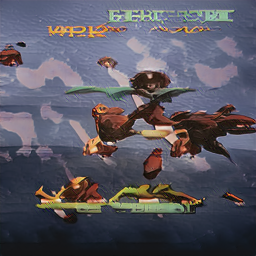

In [25]:
img

### Generate random images

In [26]:
%cd /content/

/content


In [27]:
num_images = 10

#### Without truncation

In [28]:
!python stylegan2-ada/generate.py --network={network_pkl} --outdir=out --trunc=1.0 --seeds=0-{num_images-1}

Loading networks from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Generating image for seed 0 (0/10) ...
Generating image for seed 1 (1/10) ...
Generating image for seed 2 (2/10) ...
Generating image for seed 3 (3/10) ...
Generating image for seed 4 (4/10) ...
Generating image for seed 5 (5/10) ...
Generating image for seed 6 (6/10) ...
Generating image for seed 7 (7/10) ...
Generating image for seed 8 (8/10) ...
Generating image for seed 9 (9/10) ...


#### With truncation

In [29]:
!python stylegan2-ada/generate.py --network={network_pkl} --outdir=out --trunc=0.5 --seeds=0-{num_images-1}

Loading networks from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Generating image for seed 0 (0/10) ...
Generating image for seed 1 (1/10) ...
Generating image for seed 2 (2/10) ...
Generating image for seed 3 (3/10) ...
Generating image for seed 4 (4/10) ...
Generating image for seed 5 (5/10) ...
Generating image for seed 6 (6/10) ...
Generating image for seed 7 (7/10) ...
Generating image for seed 8 (8/10) ...
Generating image for seed 9 (9/10) ...


### Style Mixing

In [30]:
%cd /content/

/content


#### Without truncation

In [31]:
!python stylegan2-ada/style_mixing.py --network={network_pkl} --outdir=out --trunc=1.0 --rows=1,41,208,322,424,939 --cols=1,41,208,322,424,939

Loading networks from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Generating W vectors...
Generating images...
Generating style-mixed images...
Saving images...
Saving image grid...


#### With truncation

In [32]:
!python stylegan2-ada/style_mixing.py --network={network_pkl} --outdir=out --trunc=0.5 --rows=1,41,208,322,424,939 --cols=1,41,208,322,424,939

Loading networks from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Generating W vectors...
Generating images...
Generating style-mixed images...
Saving images...
Saving image grid...


### Projection of real Steam banners to latent space

Reference: https://github.com/NVlabs/stylegan2-ada#projecting-images-to-latent-space

In [33]:
%cd /content/

/content


#### Target appIDs

In [34]:
target_image_app_ids = [
                        418530, # Spelunky 2
                        570, # Dota 2
                        578080, # PLAYERUNKNOWN'S BATTLEGROUNDS
                        440, # Team Fortress 2
                        730, # Counter-Strike: Global Offensive
                        304930, # Unturned
                        550, # Left 4 Dead 2
                        4000, # Garry's Mod
                        240, # Counter-Strike: Source
                        10, # Counter-Strike
                        620, # Portal 2
                        400, # Portal
                        72850, # The Elder Scrolls V: Skyrim
                        271590, # Grand Theft Auto V
                        220, # Half-Life 2
                        105600, # Terraria
                        252950, # Rocket League®
                        60, # Ricochet
                        70, # Half-Life
                        863550, # HITMAN™ 2
                        292030, # The Witcher® 3: Wild Hunt
                        377160, # Fallout 4
                        8870, # BioShock Infinite
                        48000, # LIMBO
]

anime_app_ids = [
                 236090, 282900, 324160, 331470, 337340, 344770, 351640, 400910,
                 413410, 1243670, 413420, 429660, 948740, 447530, 495890,
                 559210, 623080, 698780, 745880, 774171, 787480, 315810, 
                 1162560, 303310, 412830, 798460, 410890, 472870, 526490,
                 577480, 668350, 550340, 406550, 639490, 310360, 1034940,
                 567640, 825630, 1144400, 1202540, 913740, 1171370, 1161870, 
                 1168470, 1189630, 1178050, 1232180, 1216080, 991270, 960690, 
                 1252320, 1162070, 1111370, 1260810
                 ]

target_image_app_ids += anime_app_ids

print('#images={}'.format(
    len(target_image_app_ids))
)

#images=78


#### Constrain to a single appID (for debugging purpose)

In [35]:
target_image_app_ids = [ target_image_app_ids[0] ]

#### Download

In [36]:
def get_img_folder():
  img_folder = 'img/'
  %mkdir -p {img_folder}

  return img_folder

In [37]:
from pathlib import Path
from PIL import Image

url = 'https://cdn.cloudflare.steamstatic.com/steam/apps'
banner_name = 'library_600x900.jpg'
target_size = (256, 256)

for i, app_id in enumerate(target_image_app_ids, start=1): 
  input_name = get_img_folder() + 'downloaded_img_{}.jpg'.format(app_id)
  output_name = get_img_folder() + 'target_img_{}.jpg'.format(app_id)

  if not Path(input_name).exists():
    print('[{}/{}] Download image for appID = {}'.format(i, len(target_image_app_ids), app_id))
    !wget -O {input_name} {url}/{app_id}/{banner_name}

  if not Path(input_name).exists():
    print('Image could not be downloaded for appID = {}'.format(app_id))
    continue

  if not Path(output_name).exists():
    print('[{}/{}] Resize image for appID = {}'.format(i, len(target_image_app_ids), app_id))

    try:
      input_img = Image.open(input_name)
    except Image.UnidentifiedImageError:
      input_img = None
      print('Input image could not be opened for appID = {}'.format(app_id))
      continue
    
    output_img = input_img.resize(target_size, Image.LANCZOS)
    output_img.save(output_name)


AppID: 418530
--2020-11-04 16:03:48--  https://cdn.cloudflare.steamstatic.com/steam/apps/418530/library_600x900.jpg
Resolving cdn.cloudflare.steamstatic.com (cdn.cloudflare.steamstatic.com)... 104.18.24.217, 104.18.25.217, 2606:4700::6812:19d9, ...
Connecting to cdn.cloudflare.steamstatic.com (cdn.cloudflare.steamstatic.com)|104.18.24.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55657 (54K) [image/jpeg]
Saving to: ‘img/downloaded_img_418530.jpg’

img/downloaded_img_ 100%[===================>]  54.35K  --.-KB/s    in 0.001s  

2020-11-04 16:03:48 (88.0 MB/s) - ‘img/downloaded_img_418530.jpg’ saved [55657/55657]



#### Project

In [38]:
def get_app_id_folder(app_id):
  output_folder = 'out/{}'.format(app_id)
  %mkdir -p {output_folder}

  return output_folder

In [39]:
from pathlib import Path

for i, app_id in enumerate(target_image_app_ids, start=1):
  input_image = get_img_folder() + 'target_img_{}.jpg'.format(app_id)

  if not Path(input_image).exists():
    print('Target image could not be found for appID = {}'.format(app_id))
    continue

  output_folder = get_app_id_folder(app_id)
  output_name = output_folder + '/dlatents.npz'

  if not Path(output_name).exists():
    print('[{}/{}] Project target image for appID = {}'.format(i, len(target_image_app_ids), app_id))

    !python stylegan2-ada/projector.py  --network={network_pkl} --outdir={output_folder} --save-video=true --target={input_image}

AppID: 418530
Loading networks from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Projector: Computing W midpoint and stddev using 10000 samples...
Projector: std = 9.72759
Projector: Setting up noise inputs...
Projector: Building image output graph...
Projector: Building loss graph...
Projector: Building noise regularization graph...
Projector: Setting up optimizer...
Projector: Preparing target images...
Projector: Initializing optimization state...
100% 1000/1000 [01:57<00:00,  8.51it/s, dist=0.4648, loss=0.46]


#### Generation after projection

If the training dataset uses resolution other than 1024, then the branch `fix-assertion-error` of my fork is required to avoid an assertion error.

Reference: https://github.com/NVlabs/stylegan2-ada/issues/25

In [40]:
for app_id in target_image_app_ids:
  print('AppID: {}'.format(app_id))

  input_latent_vector = get_app_id_folder(app_id) + '/dlatents.npz'

  output_folder = 'out/image_from_latent_vector'
  %mkdir -p {output_folder}

  !python stylegan2-ada/generate.py --network={network_pkl} --outdir={output_folder} --trunc=1 --dlatents={input_latent_vector}

AppID: 418530
Loading networks from "/content/gdrive/training-runs/00025-steam-mirror-auto_no_ramp1-kimg5000-p0.713-resumecustom-freezed10/network-snapshot-005000.pkl"...
Generating images from dlatents file "out/418530/dlatents.npz"
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Saved out/image_from_latent_vector/dlatent00.png
